In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["GCR_CONFIG_SOURCE"] = "files"
from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as np
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(ROOT_DIR)
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations
from itertools import product
import utils.utils as ut
import healpy as hp
import astropy
import astropy.units as u
import astropy.cosmology.units as cu
from importlib import reload

dataColumns = np.array(
    [
        "redshift_true",
        "ra_true",
        "dec_true",
        "Mag_true_u_lsst_z0_no_host_extinction",  # Rest frame mags
        "Mag_true_g_lsst_z0_no_host_extinction",
        "Mag_true_r_lsst_z0_no_host_extinction",
        "Mag_true_i_lsst_z0_no_host_extinction",
        "Mag_true_z_lsst_z0_no_host_extinction",
        "Mag_true_Y_lsst_z0_no_host_extinction",
        "mag_true_u_lsst_no_host_extinction",  # Observed mags
        "mag_true_g_lsst_no_host_extinction",
        "mag_true_r_lsst_no_host_extinction",
        "mag_true_i_lsst_no_host_extinction",
        "mag_true_z_lsst_no_host_extinction",
        "mag_true_Y_lsst_no_host_extinction",
        "galaxyID",
        "is_central",
    ]
)

NSIDE = 128

cat_name = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name)

/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py:870: SyntaxWarning: invalid escape sequence '\p'
  a.set_ylabel("$\phi [h^3 Mpc^{-3]}]$")


# Proof of concept of the reduction pipeline

## Five cases
- Fiducial
- Fiducial + $H_0=50 \texttt{ km s}^{-1} \texttt{ Mpc}^-1$
- Fiducial + LSST Y7
- Fiducial + modeled redshift
- Fiducial + 0.3 mag uniformity

## Plots to make
- Galaxy luminosity function per band, per z-bin
- $P(z)$ distribution
- Redshift precision relative to expectation
- Magnitude non-uniformity plot across healpixel compared to expectation

## Fiducial
- $H_0=71$
- LSST Y1
- Photo-z, unmodeled
- 0.1 mag

In [3]:
year = 1  # LSST Year 1
modeled = False  # Unmodeled photo-z
uniformity = 0.1  # Mag
airmass = 1.2  # DES average
mags_deeper = 10 * uniformity  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use photometric redshifts

In [4]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=mags_deeper,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
)

CPU times: user 46.6 s, sys: 47 s, total: 1min 33s
Wall time: 2min 36s


In [84]:
reload(ut)

/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py:901: SyntaxWarning: invalid escape sequence '\p'
  # Formatting each plot


<module 'utils.utils' from '/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py'>

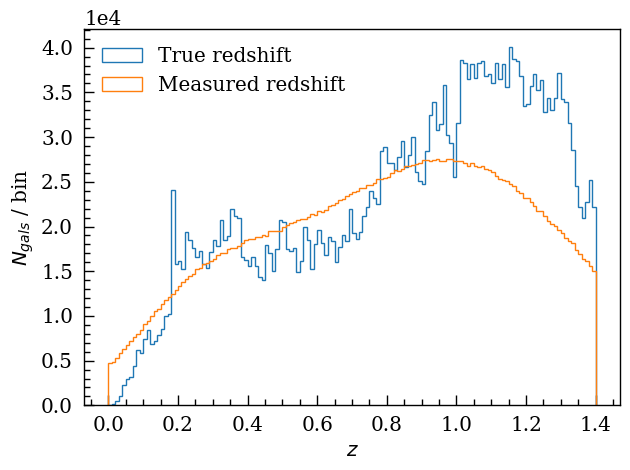

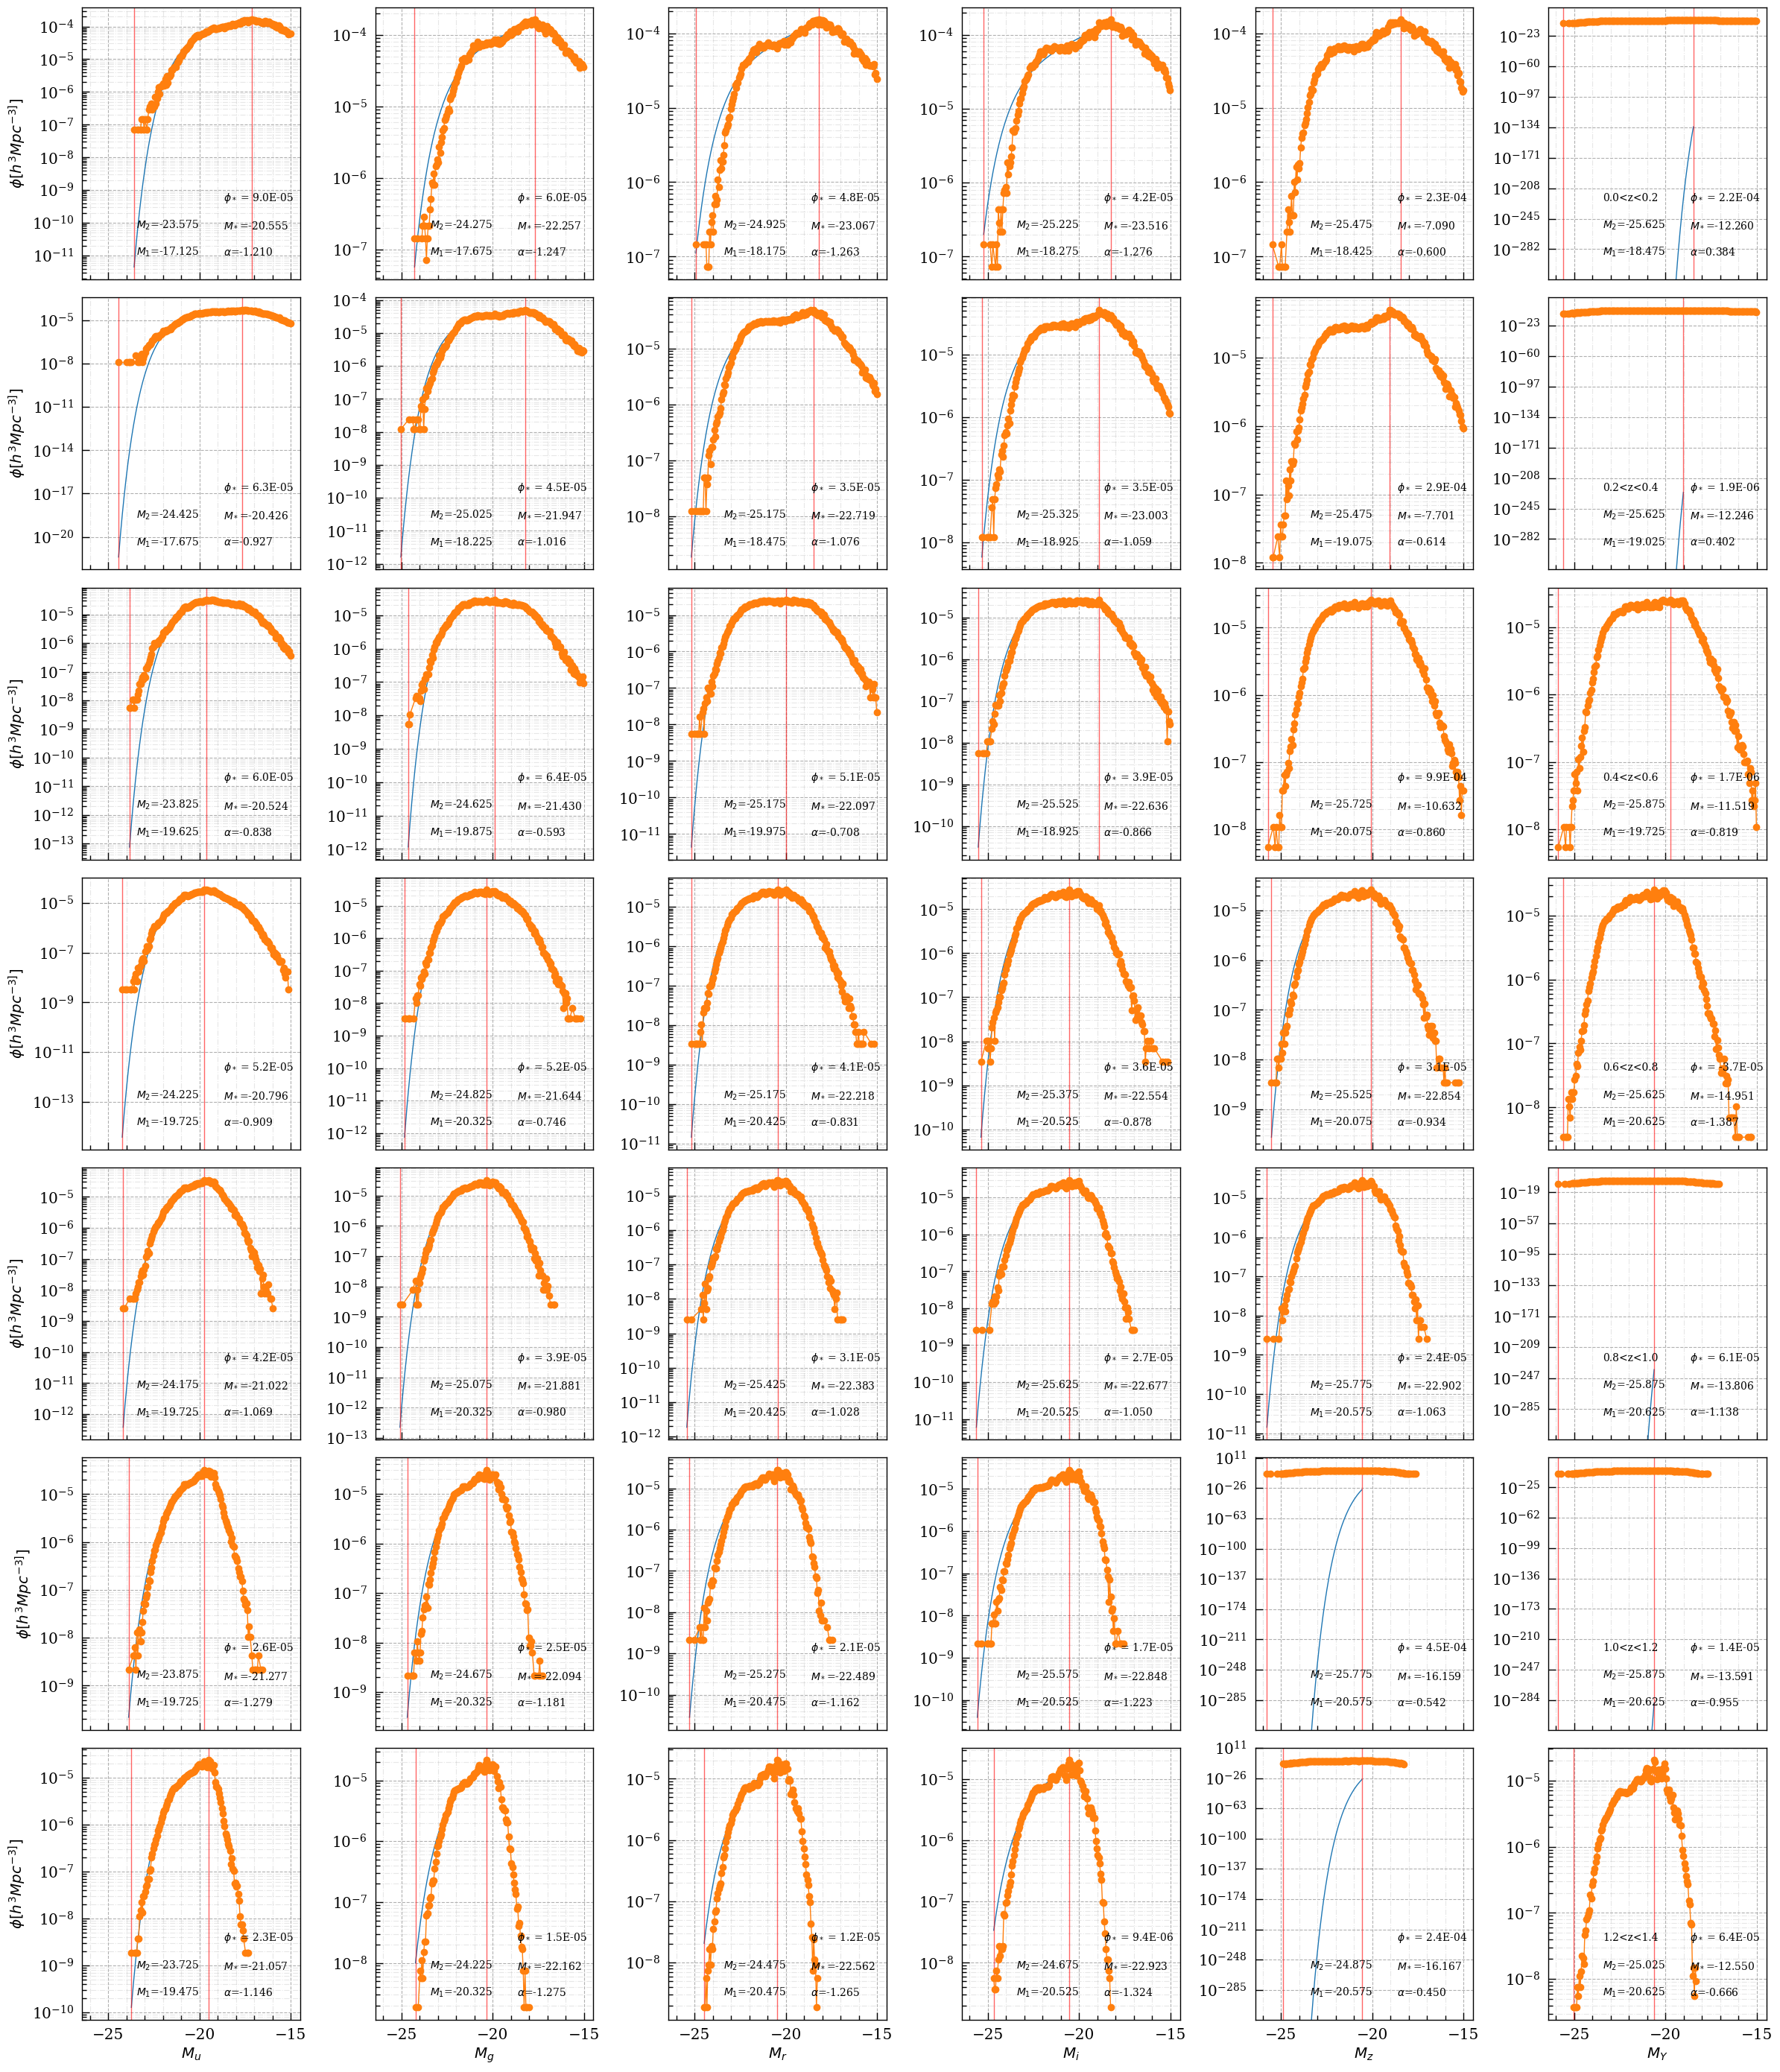

Dataframe passes magnitude limit criteria
CPU times: user 26.8 s, sys: 571 ms, total: 27.3 s
Wall time: 27.4 s


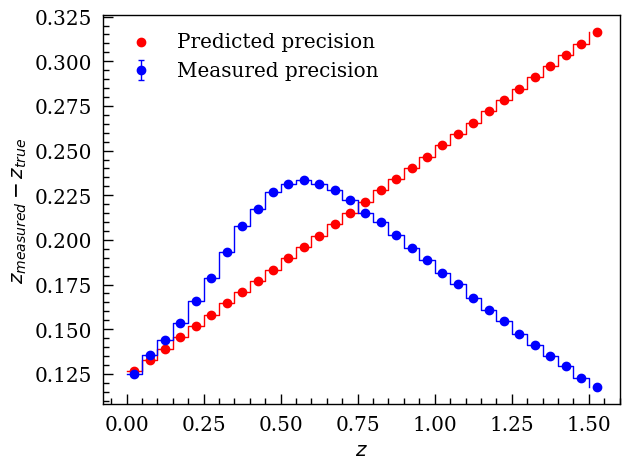

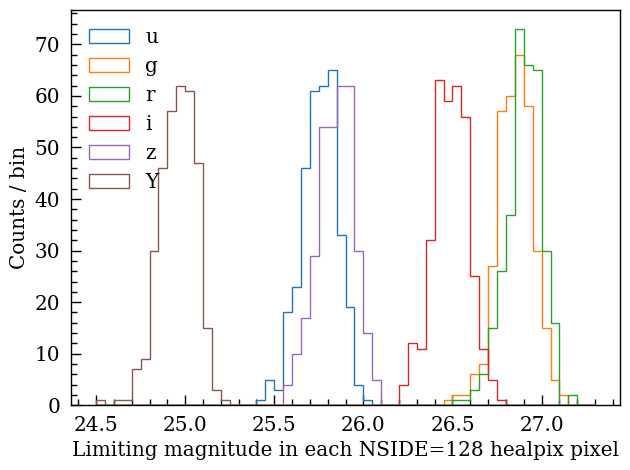

In [85]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-27,
    faintMag=-15,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
    fit_schecter=True,
    delta_mag_schecter=0.05,
)

## Fiducial + LSST Y7

In [ ]:
year = 7  # LSST Year 1
modeled = False  # Unmodeled photo-z
uniformity = 0.1  # Mag
airmass = 1.2  # DES average
mags_deeper = 10 * uniformity  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use photometric redshifts

In [ ]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=mags_deeper,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
)

In [ ]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-26,
    faintMag=-15,
    mag_low_fit=-17,
    mag_high_fit=-24,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
)

## Fiducial + modeled redshift

In [ ]:
year = 1  # LSST Year 1
modeled = True  # Unmodeled photo-z
uniformity = 0.1  # Mag
airmass = 1.2  # DES average
mags_deeper = 10 * uniformity  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use photometric redshifts

In [ ]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=mags_deeper,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
)

In [ ]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-26,
    faintMag=-15,
    mag_low_fit=-17,
    mag_high_fit=-24,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
)

## Fiducial + $H_0=50 \text{ km s}^{-1} \text{ Mpc}^{-1}$

In [ ]:
year = 1  # LSST Year 1
modeled = True  # Unmodeled photo-z
uniformity = 0.1  # Mag
airmass = 1.2  # DES average
mags_deeper = 10 * uniformity  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use photometric redshifts
alternate_h0 = 0.5

In [ ]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=mags_deeper,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
    alternate_h0=alternate_h0,  # Not yet implemented
)

In [ ]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-26,
    faintMag=-15,
    mag_low_fit=-17,
    mag_high_fit=-24,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
)

## Fiducial + 0.3 mag uniformity

In [ ]:
year = 1  # LSST Year 1
modeled = False  # Unmodeled photo-z
uniformity = 0.3  # Mag
airmass = 1.2  # DES average
mags_deeper = 1  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use photometric redshifts

In [ ]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=mags_deeper,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
)

In [ ]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-26,
    faintMag=-15,
    mag_low_fit=-17,
    mag_high_fit=-24,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
)